    generations  threads       board  sequential_s  concurrent_s
3            10        4  board_5000      1.480441      0.564319
7            10        8  board_5000      1.496570      0.387627
11           10       16  board_5000      1.535654      0.409029
15           50        4  board_5000      6.905498      2.338063
19           50        8  board_5000      6.935758      1.619461
23           50       16  board_5000      6.982724      1.627625
27          200        4  board_5000     26.263740      8.390851
31          200        8  board_5000     26.268666      5.872243
35          200       16  board_5000     26.220225      5.836648


/tmp/ipython-input-2738694057.py:73: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=gdf, x='board', y='sequential_s', hue='threads', ax=axes[0], palette=palette)
/tmp/ipython-input-2738694057.py:79: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=gdf, x='board', y='concurrent_s', hue='threads', ax=axes[1], palette=palette)


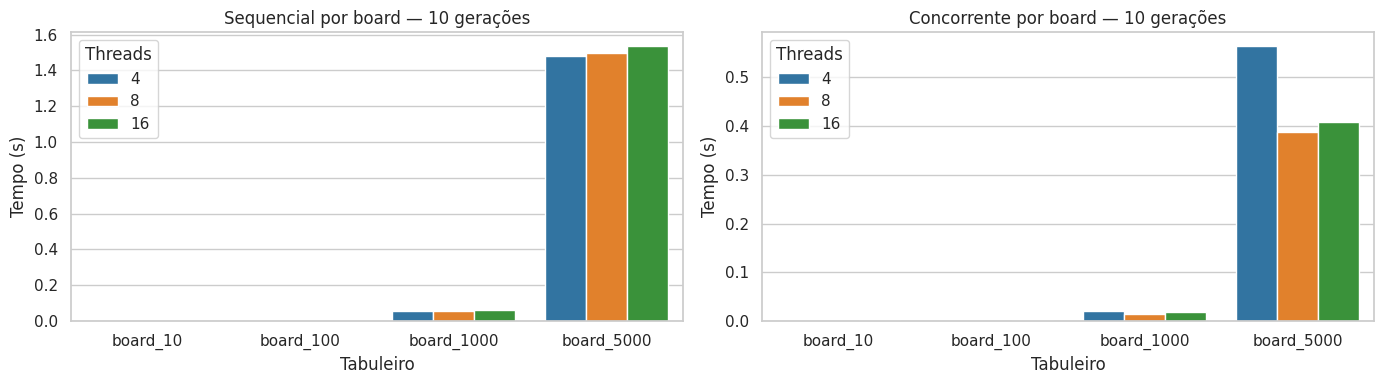

/tmp/ipython-input-2738694057.py:73: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=gdf, x='board', y='sequential_s', hue='threads', ax=axes[0], palette=palette)
/tmp/ipython-input-2738694057.py:79: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=gdf, x='board', y='concurrent_s', hue='threads', ax=axes[1], palette=palette)


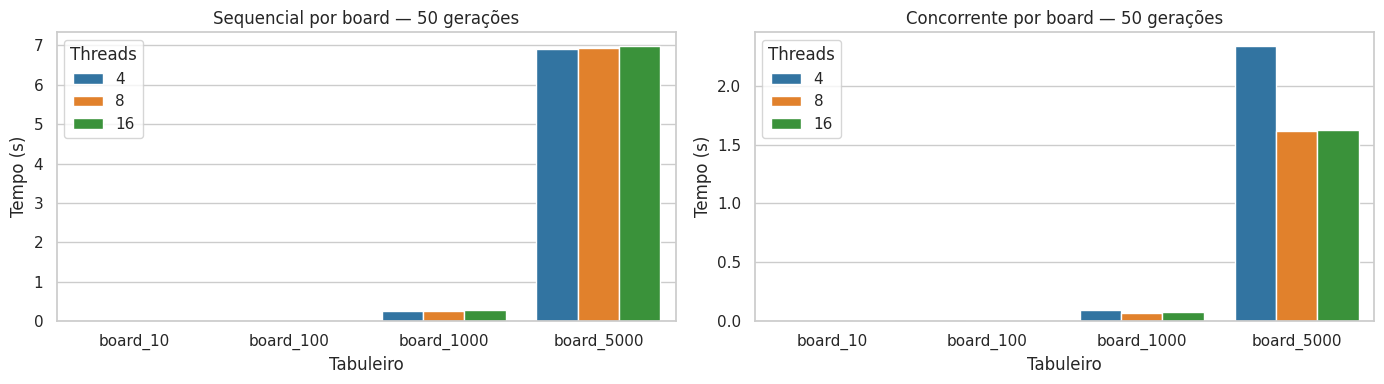

/tmp/ipython-input-2738694057.py:73: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=gdf, x='board', y='sequential_s', hue='threads', ax=axes[0], palette=palette)
/tmp/ipython-input-2738694057.py:79: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=gdf, x='board', y='concurrent_s', hue='threads', ax=axes[1], palette=palette)


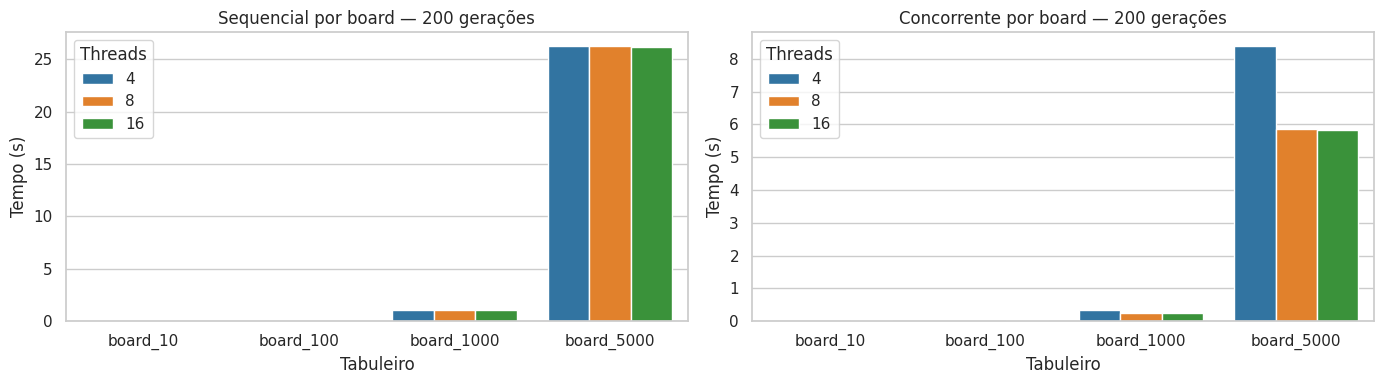

/tmp/ipython-input-2738694057.py:92: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=sdf, x='board', y='speedup', hue='generations', palette=palette)


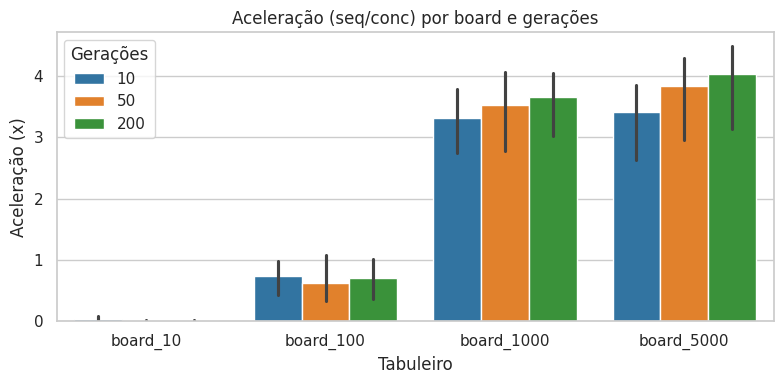

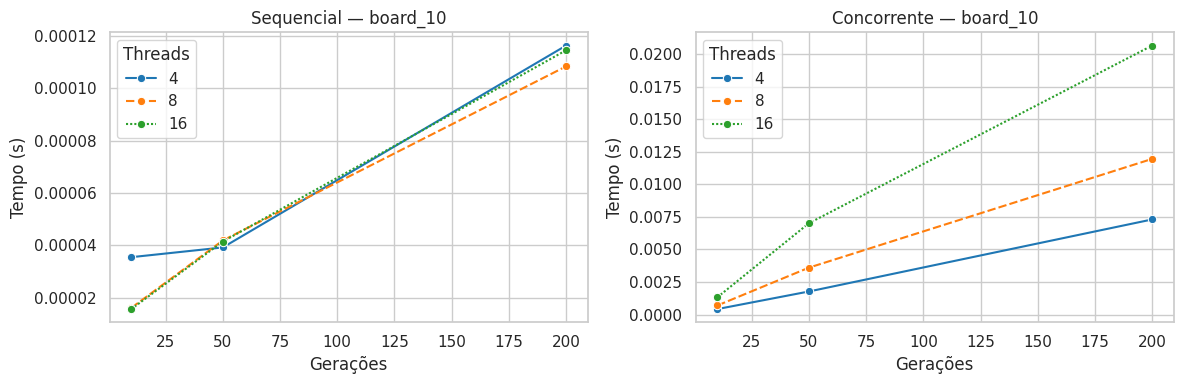

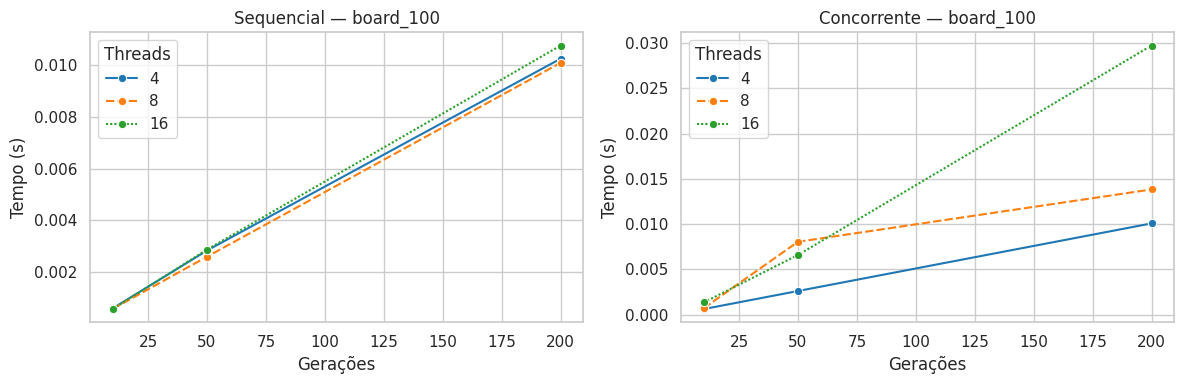

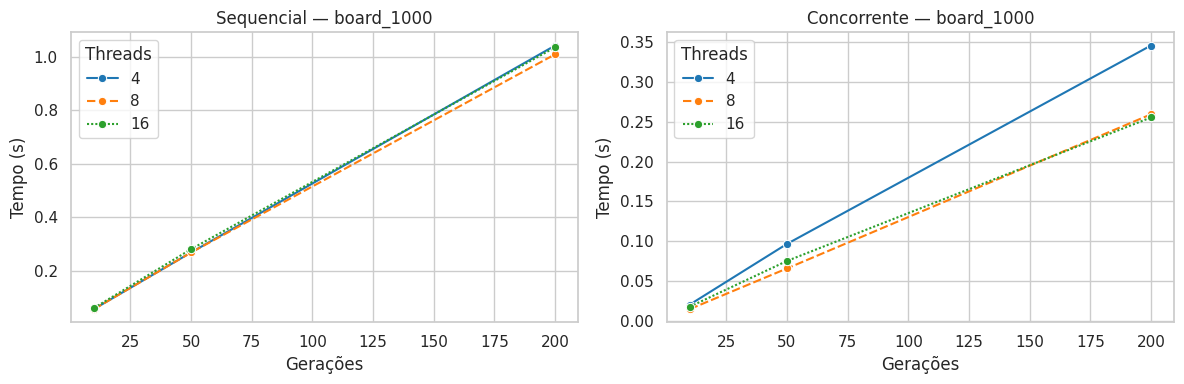

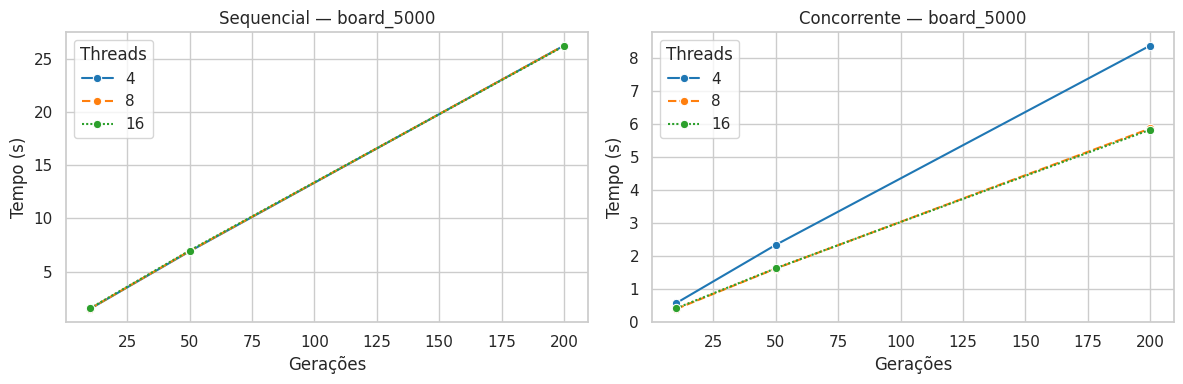

/tmp/ipython-input-2738694057.py:134: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mdf, x='board', y='time_s', hue='mode', ci=None, palette=['#4c78a8','#f58518'])


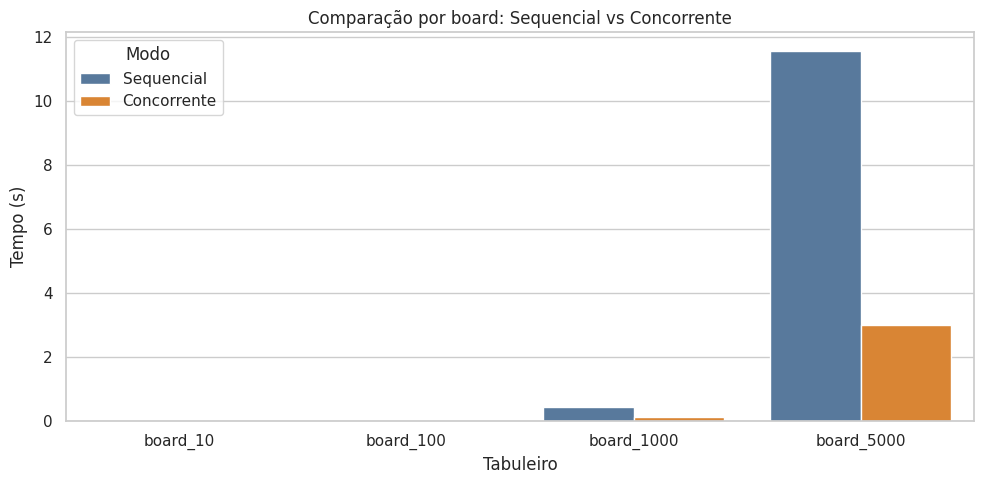

/tmp/ipython-input-2738694057.py:149: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  g = sns.catplot(


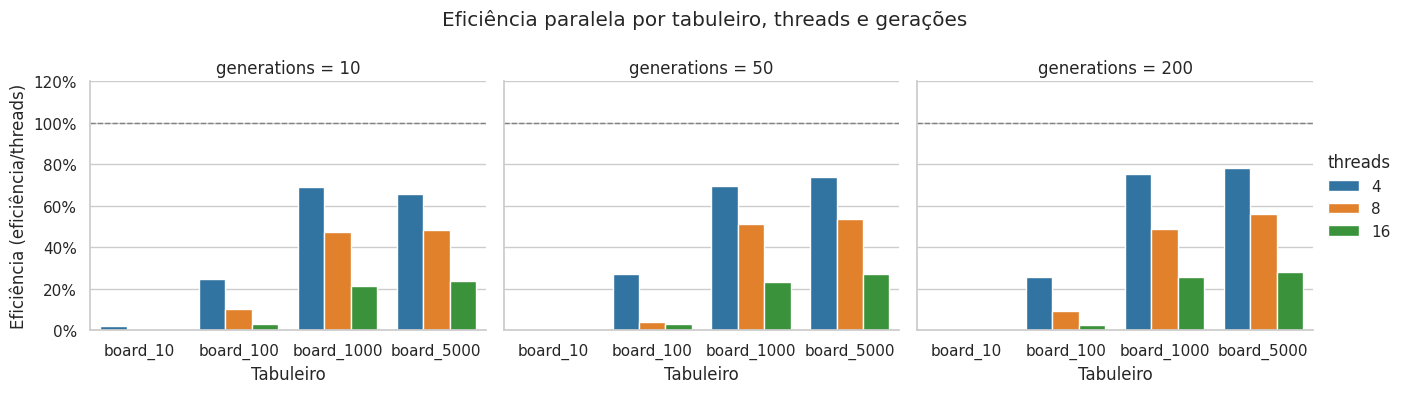

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

csv = """
generations,threads,board,sequential_s,concurrent_s
10,4,board_10,0.00003542900085449218614475,0.00042161941528320314668404
10,4,board_100,0.00060105323791503906250000,0.00061645507812499997831596
10,4,board_1000,0.05608797073364257812500000,0.02038397789001464982527878
10,4,board_5000,1.48044080734252925246607901,0.56431879997253420189196049
10,8,board_10,0.00001602172851562500067763,0.00069694519042968745663191
10,8,board_100,0.00058188438415527341581596,0.00071001052856445312500000
10,8,board_1000,0.05579514503479003628694244,0.01469154357910156319388939
10,8,board_5000,1.49656977653503409086965803,0.38762660026550294078973025
10,16,board_10,0.00001559257507324218885525,0.00132703781127929687500000
10,16,board_100,0.00057663917541503904081596,0.00134539604187011718750000
10,16,board_1000,0.06008543968200683732527878,0.01769766807556152204972122
10,16,board_5000,1.53565425872802729934107901,0.40902891159057619407946049
50,4,board_10,0.00003914833068847655978949,0.00177216529846191406250000
50,4,board_100,0.00283603668212890642347235,0.00261182785034179670152765
50,4,board_1000,0.26783690452575681373303951,0.09649748802185058316194244
50,4,board_5000,6.90549826622009277343750000,2.33806314468383780180715803
50,8,board_10,0.00004181861877441406385525,0.00360116958618164053826383
50,8,board_100,0.00259656906127929670152765,0.00805196762084960972194470
50,8,board_1000,0.26758980751037597656250000,0.06567420959472655694888488
50,8,board_5000,6.93575797080993616816613212,1.61946134567260746628392099
50,16,board_10,0.00004138946533203124864475,0.00701155662536621059055530
50,16,board_100,0.00287218093872070295152765,0.00658984184265136701402765
50,16,board_1000,0.28022422790527345970446049,0.07508411407470702569888488
50,16,board_5000,6.98272418975830078125000000,1.62762522697448730468750000
200,4,board_10,0.00011634826660156250000000,0.00730218887329101527805530
200,4,board_100,0.01024141311645507777805530,0.01008262634277343715305530
200,4,board_1000,1.04236602783203125000000000,0.34565238952636717639776975
200,4,board_5000,26.26374015808105610858547152,8.39085078239440917968750000
200,8,board_10,0.00010838508605957031792101,0.01195101737976074149361061
200,8,board_100,0.01008238792419433559055530,0.01383380889892578055611061
200,8,board_1000,1.00950198173522953659642099,0.25922498703002927467053951
200,8,board_5000,26.26866574287414479726976424,5.87224316596984863281250000
200,16,board_10,0.00011453628540039061957899,0.02065176963806152413138939
200,16,board_100,0.01075019836425781215305530,0.02973475456237793107527878
200,16,board_1000,1.03570218086242671340357901,0.25530261993408204235223025
200,16,board_5000,26.22022476196288920391452848,5.83664836883544957402136788
"""

df = pd.read_csv(io.StringIO(csv))

# Ordenar categorias para visualizações consistentes
boards_order = sorted(df['board'].unique(), key=lambda x: int(x.split('_')[1].split('.')[0]))
df['board'] = pd.Categorical(df['board'], categories=boards_order, ordered=True)
threads_order = sorted(df['threads'].unique())
generations_order = sorted(df['generations'].unique())

sns.set(style='whitegrid', context='notebook')
palette = sns.color_palette('tab10')

threads_order = sorted(df['threads'].unique())
threads_palette = sns.color_palette('tab10', n_colors=len(threads_order))
threads_hue_map = dict(zip(threads_order, threads_palette))

# 1) Para cada número de gerações, comparar tempos por board (sequencial vs concorrente separados)
for gen in generations_order:
    gdf = df[df['generations'] == gen].copy()
    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=False)
    sns.barplot(data=gdf, x='board', y='sequential_s', hue='threads', ax=axes[0], palette=palette)
    axes[0].set_title(f'Sequencial por board — {gen} gerações')
    axes[0].set_xlabel('Tabuleiro')
    axes[0].set_ylabel('Tempo (s)')
    axes[0].legend(title='Threads')

    sns.barplot(data=gdf, x='board', y='concurrent_s', hue='threads', ax=axes[1], palette=palette)
    axes[1].set_title(f'Concorrente por board — {gen} gerações')
    axes[1].set_xlabel('Tabuleiro')
    axes[1].set_ylabel('Tempo (s)')
    axes[1].legend(title='Threads')

    plt.tight_layout()
    plt.show()

# 2) Aceleracao (seq/conc) por board e gerações
sdf = df.copy()
sdf['speedup'] = sdf['sequential_s'] / sdf['concurrent_s']
plt.figure(figsize=(8,4))
sns.barplot(data=sdf, x='board', y='speedup', hue='generations', palette=palette)
plt.title('Aceleração (seq/conc) por board e gerações')
plt.xlabel('Tabuleiro')
plt.ylabel('Aceleração (x)')
plt.legend(title='Gerações')
plt.tight_layout()
plt.show()

# 3) Escalonamento com gerações para cada board (linhas por threads)
for board in boards_order:
    bdf = df[df['board'] == board].copy()
    fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=False)

    sns.lineplot(
    data=bdf, x='generations', y='sequential_s',
    hue='threads', hue_order=threads_order,
    marker='o', style='threads',
    palette=threads_hue_map, ax=axes[0])
    axes[0].set_title(f'Sequencial — {board}')
    axes[0].set_xlabel('Gerações')
    axes[0].set_ylabel('Tempo (s)')

    sns.lineplot(
    data=bdf, x='generations', y='concurrent_s',
    hue='threads', hue_order=threads_order,
    marker='o', style='threads',
    palette=threads_hue_map, ax=axes[1])
    axes[1].set_title(f'Concorrente — {board}')
    axes[1].set_xlabel('Gerações')
    axes[1].set_ylabel('Tempo (s)')

    handles, labels = axes[1].get_legend_handles_labels()
    axes[0].legend(handles, labels, title='Threads')
    axes[1].legend(title='Threads')

    plt.tight_layout()
    plt.show()

# 4) Comparação direta (todas as configs) Sequencial vs Concorrente
mdf = df.melt(id_vars=['generations','threads','board'], value_vars=['sequential_s','concurrent_s'],
              var_name='mode', value_name='time_s')
plt.figure(figsize=(10,5))
sns.barplot(data=mdf, x='board', y='time_s', hue='mode', ci=None, palette=['#4c78a8','#f58518'])
plt.title('Comparação por board: Sequencial vs Concorrente')
plt.xlabel('Tabuleiro')
plt.ylabel('Tempo (s)')
plt.legend(title='Modo', labels=['Sequencial','Concorrente'])
plt.tight_layout()
plt.show()

# 5) Eficiência paralela: efficiency = speedup / threads
edf = sdf.copy()
edf['efficiency'] = edf['speedup'] / edf['threads']

# Eficiência por board, com hue = threads e col = generations
g = sns.catplot(
    data=edf,
    x='board', y='efficiency', hue='threads', col='generations',
    kind='bar', palette=palette, height=4, aspect=1.1, sharey=True
)
g.set_axis_labels('Tabuleiro', 'Eficiência (eficiência/threads)')
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.set_ylim(0, 1.2)
    ax.axhline(1.0, ls='--', c='gray', lw=1)

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Eficiência paralela por tabuleiro, threads e gerações')
plt.show()

